Dataset found in https://github.com/RamiKrispin/coronavirus

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [3]:
data = pd.read_csv('coronavirus_dataset.csv')

In [4]:
print(data['type'].unique())
data.head()

['confirmed' 'death' 'recovered']


,Province.State,Country.Region,Lat,Long,date,cases,type
0,NaN,Japan,36.0000,138.0000,2020-01-22,2,confirmed
1,NaN,South Korea,36.0000,128.0000,2020-01-22,1,confirmed
2,NaN,Thailand,15.0000,101.0000,2020-01-22,2,confirmed
3,Anhui,Mainland China,31.8257,117.2264,2020-01-22,1,confirmed
4,Beijing,Mainland China,40.1824,116.4142,2020-01-22,14,confirmed


In [5]:
uk = data[data['Country.Region'] == 'UK']
uk_dth = uk[uk['type'] == 'death'][['date', 'cases']]
uk_dth_2 = uk_dth.copy()
for date in uk_dth['date']:
    uk_dth['cases'][uk_dth['date'] == date] = np.sum(uk_dth_2['cases'][uk_dth['date'] <= date])

In [9]:
uk_dth

,date,cases
2854,2020-03-05,1
2994,2020-03-06,2


In [11]:
uk_conf = uk[uk['type'] == 'confirmed'][['date', 'cases']]
uk_conf_2 = uk_conf.copy()
for date in uk_conf['date']:
    uk_conf['cases'][uk_conf['date'] == date] = np.sum(uk_conf_2['cases'][uk_conf['date'] <= date]) - np.sum(uk_dth['cases'][uk_dth['date'] == date])
    

In [12]:
uk_conf

,date,cases
375,2020-01-31,2
791,2020-02-07,3
1003,2020-02-10,8
1141,2020-02-12,9
1967,2020-02-24,13
2179,2020-02-27,15
2255,2020-02-28,20
2336,2020-02-29,23
2432,2020-03-01,36
2515,2020-03-02,40


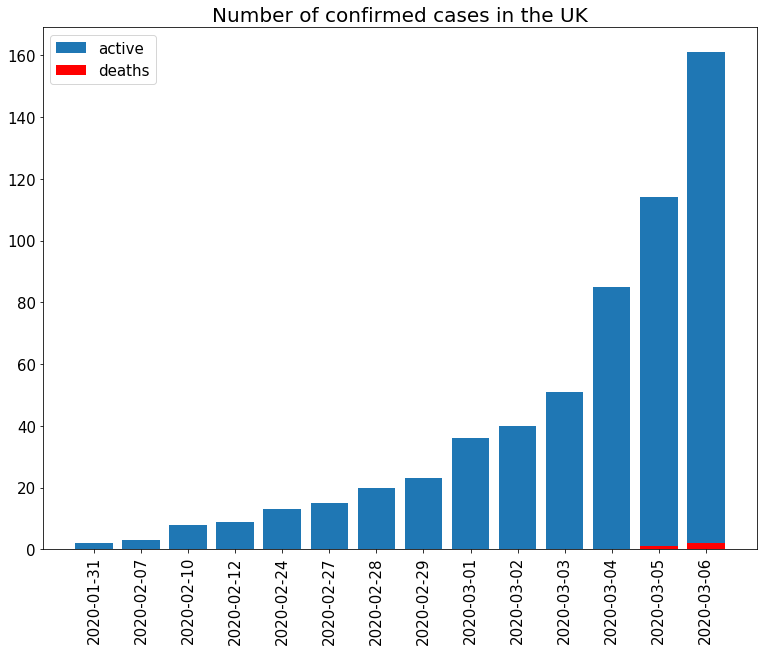

In [14]:
fig = plt.figure(figsize = (12.8, 9.6))

plt.bar(uk_conf['date'], uk_conf['cases'])
plt.bar(uk_dth['date'], uk_dth['cases'], color ='r')
plt.title('Number of confirmed cases in the UK', fontdict = {'fontsize': 20})
plt.legend(['active', 'deaths'], fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(rotation=90, fontsize = 15)

plt.show()

In [15]:
date_death = data[data['type'] == 'death'][['date', 'cases']]
date_death = date_death.groupby('date')['cases'].agg(np.sum)
date_conf = data[data['type'] == 'confirmed'][['date', 'cases']]
date_conf = date_conf.groupby('date')['cases'].agg(np.sum)
date_rec = data[data['type'] == 'recovered'][['date', 'cases']]
date_rec = date_rec.groupby('date')['cases'].agg(np.sum)

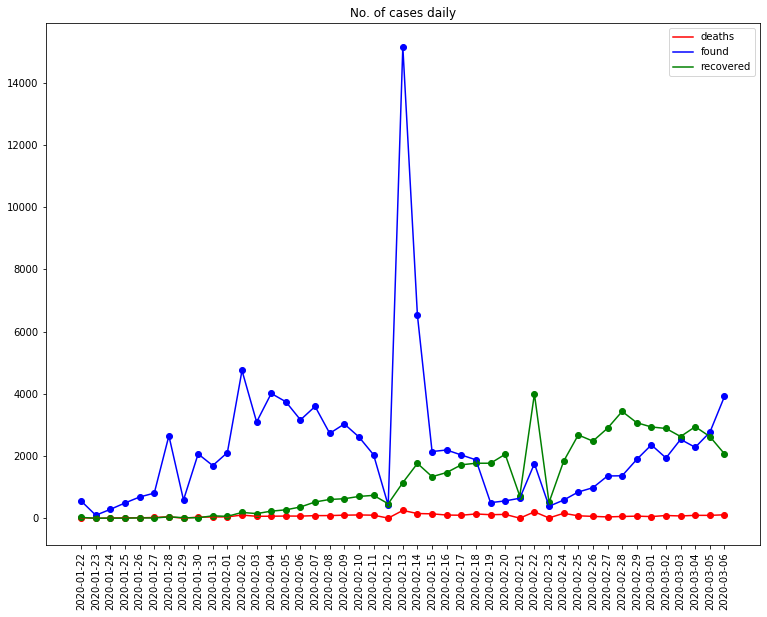

In [16]:
fig = plt.figure(figsize = (12.8, 9.6))

plt.scatter(data['date'].unique(), date_death, c = 'r')
plt.scatter(data['date'].unique(), date_conf, c = 'b')
plt.scatter(data['date'].unique(), date_rec, c = 'g')
plt.plot(data['date'].unique(), date_death, c = 'r')
plt.plot(data['date'].unique(), date_conf, c = 'b')
plt.plot(data['date'].unique(), date_rec, c = 'g')
plt.legend(['deaths', 'found', 'recovered'])
plt.title('No. of cases daily')
plt.xticks(rotation=90)
plt.show()

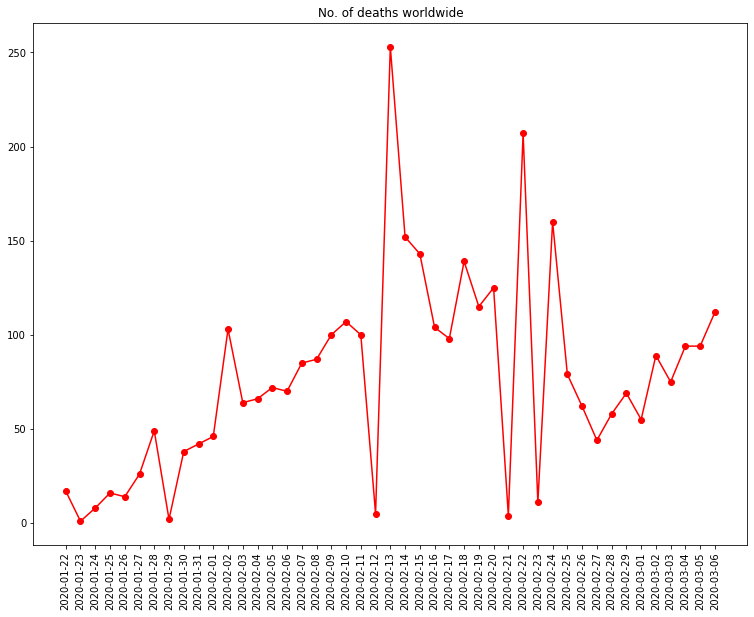

In [17]:
fig = plt.figure(figsize = (12.8, 9.6))
plt.scatter(data['date'].unique(), date_death, c = 'r')
plt.xticks(rotation=90)
plt.title('No. of deaths worldwide')
plt.plot(data['date'].unique(), date_death, c = 'r')

In [18]:
date_rec_2 = date_rec.copy()
date_conf_2 = date_conf.copy()
date_death_2 = date_death.copy()
for date in date_death.index:
    date_death[date] =date_death_2[date_rec.index <= date].sum()
for date in date_rec.index:
    date_rec[date] = date_rec_2[date_rec.index <= date].sum()
for date in date_conf.index:
    date_conf[date] = date_conf_2[date_conf.index <= date].sum()
confirmed = date_conf.copy()

In [19]:
for date in date_conf.index:
    date_conf[date] = date_conf[date] - date_rec_2[date_rec.index <= date].sum() - date_death_2[date_rec.index <= date].sum()

In [20]:
date_rec > date_conf

date
2020-01-22    False
2020-01-23    False
2020-01-24    False
2020-01-25    False
2020-01-26    False
2020-01-27    False
2020-01-28    False
2020-01-29    False
2020-01-30    False
2020-01-31    False
2020-02-01    False
2020-02-02    False
2020-02-03    False
2020-02-04    False
2020-02-05    False
2020-02-06    False
2020-02-07    False
2020-02-08    False
2020-02-09    False
2020-02-10    False
2020-02-11    False
2020-02-12    False
2020-02-13    False
2020-02-14    False
2020-02-15    False
2020-02-16    False
2020-02-17    False
2020-02-18    False
2020-02-19    False
2020-02-20    False
2020-02-21    False
2020-02-22    False
2020-02-23    False
2020-02-24    False
2020-02-25    False
2020-02-26    False
2020-02-27    False
2020-02-28    False
2020-02-29    False
2020-03-01     True
2020-03-02     True
2020-03-03     True
2020-03-04     True
2020-03-05     True
2020-03-06     True
Name: cases, dtype: bool

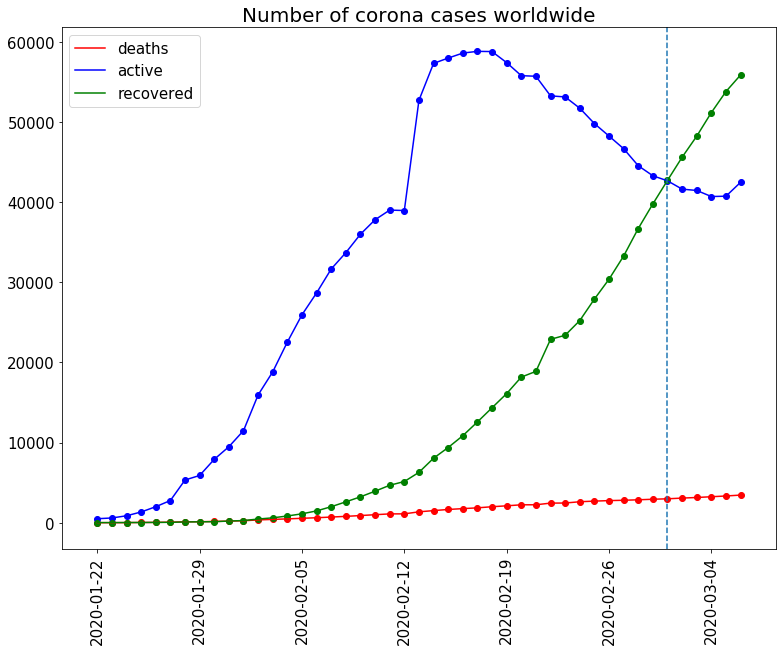

In [21]:
fig = plt.figure(figsize = (12.8, 9.6))

plt.scatter(data['date'].unique(), date_death, c = 'r')
plt.scatter(data['date'].unique(), date_conf, c = 'b')
plt.scatter(data['date'].unique(), date_rec, c = 'g')
plt.plot(data['date'].unique(), date_death, c = 'r')
plt.plot(data['date'].unique(), date_conf, c = 'b')
plt.plot(data['date'].unique(), date_rec, c = 'g')
plt.legend(['deaths', 'active', 'recovered'], fontsize = 15)
plt.axvline('2020-03-01', linestyle = '--')
plt.title('Number of corona cases worldwide', fontdict = {'fontsize': 20})
plt.yticks(fontsize = 15)
plt.xticks(ticks = [7*x for x in range(int(len(data['date'].unique())/7)+1)], rotation=90, fontsize = 15)
plt.show()


In [22]:
china = data[data['Country.Region'] == 'Mainland China'].groupby(['date', 'type'])
china_conf = china['cases'].agg(np.sum)[:, 'confirmed']


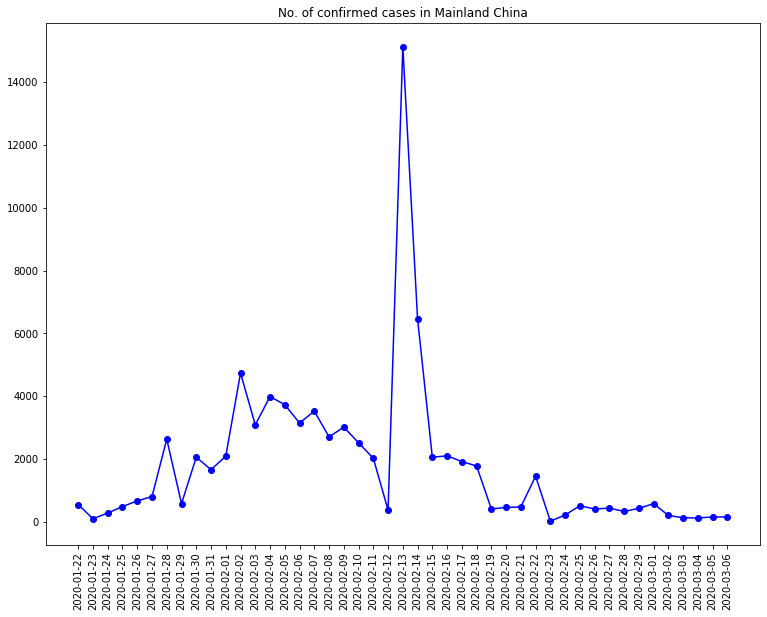

In [23]:
fig = plt.figure(figsize = (12.8, 9.6))


plt.scatter(data['date'].unique(), china_conf, c = 'b')
plt.title('No. of confirmed cases in Mainland China')
plt.plot(data['date'].unique(), china_conf, c = 'b')
plt.xticks(rotation = 90)
plt.show()

In [24]:
import datetime as dt

In [25]:
date_death.index = [dt.datetime.strptime(x, '%Y-%m-%d') for x in date_death.index]
date_conf.index = [dt.datetime.strptime(x, '%Y-%m-%d') for x in date_conf.index]

In [26]:
print('Today is ' + date_conf.index[-1].strftime("%A %d. %B %Y"))
print('Total number of active cases: ' + str(date_conf[-1]))
print('Total number of recovered cases: ' + str(date_rec[-1]))
print('Total number of dead cases: ' + str(date_death[-1]))
print('Total number of people contracting the desease: ' + str(confirmed[-1]))

Today is Friday 06. March 2020
Total number of active cases: 42474
Total number of recovered cases: 55866
Total number of dead cases: 3460
Total number of people contracting the desease: 101800


In [27]:
print('Now some percentages:')
print('Percentage of cases that recovered:' + str(100*date_rec[-1]/confirmed[-1]) + '%')
print('Percentage of cases that are active :' + str(100*date_conf[-1]/confirmed[-1]) + '%')
print('Percentage of cases that are dead:' + str(100*date_death[-1]/confirmed[-1]) + '%')

Now some percentages:
Percentage of cases that recovered:54.87819253438114%
Percentage of cases that are active :41.722986247544206%
Percentage of cases that are dead:3.398821218074656%


In [29]:
countries = data['Country.Region'].unique()
countries = pd.Series(countries)

In [30]:
active = []
recovered = []
deaths = []
for c in data['Country.Region'].unique():
    dths = data[data['Country.Region'] == c][data['type'] == 'death']['cases'].sum()
    rec = data[data['Country.Region'] == c][data['type'] == 'recovered']['cases'].sum()
    act = data[data['Country.Region'] == c][data['type'] == 'confirmed']['cases'].sum() -dths -rec
    deaths.append(dths)
    recovered.append(rec)
    active.append(act)

In [31]:
active = pd.Series(active)
recovered = pd.Series(recovered)
deaths = pd.Series(deaths)

In [32]:
corona_virus_upd = pd.concat([countries, active, recovered, deaths], axis = 1)
corona_virus_upd.head()

,0,1,2,3
0,Japan,368,46,6
1,South Korea,6416,135,42
2,Thailand,16,31,1
3,Mainland China,23643,53888,3042
4,US,256,8,14


In [33]:
Lat = []
Long = []
for c in countries:
    lat = data[data['Country.Region'] == c]['Lat'].iloc[0]
    long = data[data['Country.Region'] == c]['Long'].iloc[0]
    Lat.append(lat)
    Long.append(long)
    

In [34]:
Lat = pd.Series(Lat)
Long = pd.Series(Long)

In [35]:
corona_virus_upd = pd.concat([corona_virus_upd, Lat, Long], axis = 1)
corona_virus_upd.columns = ['Countries', 'Active', 'Recovered', 'Deaths', 'Lat', 'Long']
corona_virus_upd.head()

,Countries,Active,Recovered,Deaths,Lat,Long
0,Japan,368,46,6,36.0000,138.0000
1,South Korea,6416,135,42,36.0000,128.0000
2,Thailand,16,31,1,15.0000,101.0000
3,Mainland China,23643,53888,3042,31.8257,117.2264
4,US,256,8,14,47.6062,-122.3321


In [36]:
corona_virus_upd.loc[3,'Countries'] = 'China'

In [37]:
corona_virus_upd['Date'] = date_conf.index[-1].strftime("%A %d. %B %Y")

In [38]:
corona_virus_upd['Total'] = confirmed[-1]

In [39]:
corona_virus_upd.head()

,Countries,Active,Recovered,Deaths,Lat,Long,Date,Total
0,Japan,368,46,6,36.0000,138.0000,Friday 06. March 2020,101800
1,South Korea,6416,135,42,36.0000,128.0000,Friday 06. March 2020,101800
2,Thailand,16,31,1,15.0000,101.0000,Friday 06. March 2020,101800
3,China,23643,53888,3042,31.8257,117.2264,Friday 06. March 2020,101800
4,US,256,8,14,47.6062,-122.3321,Friday 06. March 2020,101800


In [40]:
corona_virus_upd.to_csv('corona_updated')

In [41]:
data_2 = pd.read_csv('coronavirus_dataset.csv')

In [42]:
data_2.head()

,Province.State,Country.Region,Lat,Long,date,cases,type
0,NaN,Japan,36.0000,138.0000,2020-01-22,2,confirmed
1,NaN,South Korea,36.0000,128.0000,2020-01-22,1,confirmed
2,NaN,Thailand,15.0000,101.0000,2020-01-22,2,confirmed
3,Anhui,Mainland China,31.8257,117.2264,2020-01-22,1,confirmed
4,Beijing,Mainland China,40.1824,116.4142,2020-01-22,14,confirmed


In [43]:
data_2 = data_2.iloc[:, 1:]
data_2.head()

,Country.Region,Lat,Long,date,cases,type
0,Japan,36.0000,138.0000,2020-01-22,2,confirmed
1,South Korea,36.0000,128.0000,2020-01-22,1,confirmed
2,Thailand,15.0000,101.0000,2020-01-22,2,confirmed
3,Mainland China,31.8257,117.2264,2020-01-22,1,confirmed
4,Mainland China,40.1824,116.4142,2020-01-22,14,confirmed


In [44]:
data_2.rename(columns = {'Country.Region': 'country'}, inplace = True)
data_2.head()

,country,Lat,Long,date,cases,type
0,Japan,36.0000,138.0000,2020-01-22,2,confirmed
1,South Korea,36.0000,128.0000,2020-01-22,1,confirmed
2,Thailand,15.0000,101.0000,2020-01-22,2,confirmed
3,Mainland China,31.8257,117.2264,2020-01-22,1,confirmed
4,Mainland China,40.1824,116.4142,2020-01-22,14,confirmed


In [45]:
data_2.loc[data_2['country'] == 'Mainland China','country'] = 'China'

In [46]:
data_2.head()

,country,Lat,Long,date,cases,type
0,Japan,36.0000,138.0000,2020-01-22,2,confirmed
1,South Korea,36.0000,128.0000,2020-01-22,1,confirmed
2,Thailand,15.0000,101.0000,2020-01-22,2,confirmed
3,China,31.8257,117.2264,2020-01-22,1,confirmed
4,China,40.1824,116.4142,2020-01-22,14,confirmed


In [47]:
conf = data_2[data_2['type'] == 'confirmed']
rec = data_2[data_2['type'] == 'recovered']
dth = data_2[data_2['type'] == 'death']
dates = data_2['date'].unique()
ctrs = data_2['country'].unique()

In [48]:
dth.head()

,country,Lat,Long,date,cases,type
29,China,30.9756,112.2707,2020-01-22,17,death
59,China,38.0428,114.5149,2020-01-23,1,death
93,China,47.8620,127.7615,2020-01-24,1,death
94,China,30.9756,112.2707,2020-01-24,7,death
132,China,30.9756,112.2707,2020-01-25,16,death


In [65]:
upd = pd.DataFrame([], columns = ['country', 'date', 'deaths', 'recovered', 'active'])

In [66]:
for c in ctrs:
    for d in dates:
        deaths = np.sum(dth['cases'][dth['country'] == c][dth['date'] == d])
        recovered = np.sum(rec['cases'][rec['country'] == c][rec['date'] == d])
        active = np.sum(conf['cases'][conf['country'] == c][conf['date'] == d]) - deaths -recovered
        new_row = {'country': c, 'date': d, 'deaths': deaths, 'recovered': recovered, 'active': active}
        upd = upd.append(new_row, ignore_index=True)


In [67]:
Lat = []
Long = []
for c in ctrs:
    lat = data_2[data_2['country'] == c]['Lat'].iloc[0]
    long = data_2[data_2['country'] == c]['Long'].iloc[0]
    Lat.append(lat)
    Long.append(long)
    

In [68]:
upd.head()    

,country,date,deaths,recovered,active
0,Japan,2020-01-22,0,0,2
1,Japan,2020-01-23,0,0,-1
2,Japan,2020-01-24,0,0,1
3,Japan,2020-01-25,0,0,0
4,Japan,2020-01-26,0,1,1


In [69]:
upd['lat'] = np.zeros(upd.shape[0])
upd['long'] = np.zeros(upd.shape[0])


In [70]:
for i in range(len(ctrs)):
    upd['lat'][upd['country'] == ctrs[i]] = Lat[i]
    upd['long'][upd['country'] == ctrs[i]] = Long[i]

In [ ]:
dd = []
rr = []
aa = []
for c in ctrs:
    for d in dates:
        deaths = np.sum(dth['cases'][dth['country'] == c][dth['date'] <= d])
        recovered = np.sum(rec['cases'][rec['country'] == c][rec['date'] <= d])
        active = np.sum(conf['cases'][conf['country'] == c][conf['date'] <= d]) - deaths -recovered
        dd.append(deaths)
        rr.append(recovered)
        aa.append(active)

In [ ]:
dd = pd.Series(dd)
rr = pd.Series(rr)
aa = pd.Series(aa)
upd = pd.concat([upd, dd, rr, aa], axis =1)

In [ ]:
upd.head()

In [ ]:
upd.columns = ['Countries', 'Date', 'Deaths', 'Recovered','Active', 'Lat', 'Long','deaths_now', 'recovered_now', 'active_now']

In [ ]:
upd.to_csv('corona_new.csv')